# Part 1: Volumetric Understanding of the Data

Loading appropriate libraries

In [47]:
import pandas as pd 
import re

import matplotlib.pyplot as plt

Reading in the Data

In [48]:
# Read in data 
data = pd.read_csv('./Data/all_data.csv')

# Understand output of data
data.head(2)

,Unnamed: 0,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,in_reply_to_screen_name,...,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic_y
0,0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,NaN,NaN,...,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams
1,1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,NaN,NaN,...,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams


Basic Text Cleaning

In [49]:
# regex statement for cleaning 
replace = [
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "number"),             # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "), # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

# looping through all Tweets and applying regex cleaning 
train_sentences = []
for i, d in enumerate(data['text']):
    for repl in replace:
        d = re.sub(repl[0], repl[1], d)
    train_sentences.append(d)

# writing output of regex cleaning to df column 
data['cleaned_text'] = train_sentences

## EDA

In [50]:
print("There are {} Tweets in our dataset".format(len(data)))

There are 51336 Tweets in our dataset


Understanding distribution of data by search term topic - i.e. keywords used in Twitter query search 

In [51]:
# grouping by search term topic (combo of kemp, abrams, or election)
topic_counts = data.groupby('topic_y').count() \
                    .reset_index() \
                    .rename(columns = {'topic_y': 'topic', 'Unnamed: 0': 'counts'})

topic_counts = topic_counts[['topic', 'counts']]

# getting proportions of data represented by each search topic 
topic_counts['proportion'] = topic_counts['counts'] / sum(topic_counts['counts'])

topic_counts.head()

,topic,counts,proportion
0,abrams,32299,0.629169
1,"abrams, election",576,0.011220
2,"abrams, kemp",2228,0.043400
3,"abrams, kemp, election",780,0.015194
4,election,3726,0.072581


Looking at these results visually

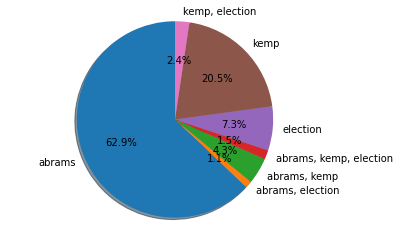

In [52]:
fig1, ax1 = plt.subplots()
ax1.pie(topic_counts['proportion'], labels = topic_counts['topic'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

basic EDA

- distribution of data 
- amount of tweets 

keyword associations to determine tweet mentions 

- keywords associated with each candidate 
- bin tweet into "mentions" category such that each tweet mentions 
    - candidate 1
    - candidate 2 
    - both candidates 
    - the election in general 

time series analysis 

- mentions of each candidate over time
(rate of increase or decrease of mentions over time) 

- overall which candidate is being talked about the most 